In [105]:
import numpy
from pathlib  import Path

from matplotlib import pyplot as plt
import numpy as np
from copy import copy
import datetime

import rioxarray
import xarray
import a301_lib

import utm
import scipy as sc
import seaborn as sns

In [3]:
def calc_mean_ndvi_L89(dataset_list):
    '''
    Calculated the mean ndvi for each file in dataset_list and saves 
    the date and the mean ndvi value to a dictionary, ndvi_dict.
    
    Parameters:
    -----------
    
    dataset_list: PosixPath
        PosixPath to directory with geotiff produced by write_ndvi_array
        
    Returns:
    --------
    
    ndvi_dict: dictionary
        Dictionary with the average value of ndvi for each file in dataset_list
    '''
    ndvi_dict = {'date':[], 'mean_ndvi':[], "max":[],"min":[]}                  #initialize dictionary
    for file in dataset_list:
        ds=rioxarray.open_rasterio(file, mask_and_scale=True) #opens file with rioxarray
        ndvi_array = ds['ndvi']                               #extract ndvi array from dataset
        mean_ndvi = ndvi_array.mean()                         #calculated mean ndvi value from array
        stdev = ndvi_array.std()
        ndvi_max = mean_ndvi+2*stdev
        ndvi_min = mean_ndvi-2*stdev
        date = datetime.datetime.strptime(ds.day,"%Y-%m-%d")  #changes string date to datetime object
        ndvi_dict["date"].append(date)                        #appends date to ndvi_dict
        ndvi_dict["mean_ndvi"].append(mean_ndvi)              #appends mean_ndvi to ndvi_dict
        ndvi_dict["max"].append(ndvi_max)
        ndvi_dict["min"].append(ndvi_min)
    return ndvi_dict

def calc_mean_ndvi_L457(NIR_list, RED_list):
    ndvi_dict = {'date':[], 'mean_ndvi':[], "max":[],"min":[]}                   #initialize dictionary
    indexes = np.arange(0,len(NIR_list))
    for i in indexes:
        NIR = rioxarray.open_rasterio(NIR_list[i], mask_and_scale=True) #opens file with rioxarray
        RED = rioxarray.open_rasterio(RED_list[i], mask_and_scale=True) #opens file with rioxarray
        ndvi_array = (NIR - RED)/(NIR + RED)                             #extract ndvi array from dataset
        mean_ndvi = ndvi_array.mean()                         #calculated mean ndvi value from array
        stdev = ndvi_array.std()
        ndvi_max = mean_ndvi+2*stdev
        ndvi_min = mean_ndvi-2*stdev
        date = datetime.datetime.strptime(str(NIR_list[i])[-19:-9],"%Y-%m-%d")  #changes string date to datetime object
        ndvi_dict["date"].append(date)                        #appends date to ndvi_dict
        ndvi_dict["mean_ndvi"].append(mean_ndvi)              #appends mean_ndvi to ndvi_dict
        ndvi_dict["max"].append(ndvi_max)
        ndvi_dict["min"].append(ndvi_min)
    return ndvi_dict

In [4]:
# File Directories of Google EE images (before 2013 spring)
ana_NIR_dir = a301_lib.sat_data / "ajb/landsatee/clipped/ana/nir"
ana_NIR_files = sorted(list(ana_NIR_dir.glob("*tiff")))

con_NIR_dir = a301_lib.sat_data / "ajb/landsatee/clipped/con/nir"
con_NIR_files = sorted(list(con_NIR_dir.glob("*tiff")))

ana_RED_dir = a301_lib.sat_data / "ajb/landsatee/clipped/ana/red"
ana_RED_files = sorted(list(ana_RED_dir.glob("*tiff")))

con_RED_dir = a301_lib.sat_data / "ajb/landsatee/clipped/con/red"
con_RED_files = sorted(list(con_RED_dir.glob("*tiff")))

# File Directories of Best HLS files (2013 spring and later)

ana_dir = a301_lib.sat_data / "ajb/best_images/ndvi_geotiff_output/analysis"
ana_files = sorted(list(ana_dir.glob("*nc")))

con_dir = a301_lib.sat_data / "ajb/best_images/ndvi_geotiff_output/control"
con_files = sorted(list(con_dir.glob("*nc")))

In [5]:
ana_L457_ndvi_dict = calc_mean_ndvi_L457(ana_NIR_files, ana_RED_files)
con_L457_ndvi_dict = calc_mean_ndvi_L457(con_NIR_files, con_RED_files)

/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedo

In [6]:
ana_L89_ndvi_dict = calc_mean_ndvi_L89(ana_files)
con_L89_ndvi_dict = calc_mean_ndvi_L89(con_files)

/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [7]:
def calc_yearly_ndvi_L457(nir_list, red_list):
    '''
    Calculated the yearly mean ndvi for each file in dataset_list and saves 
    the date and the mean ndvi value to a dictionary, ndvi_dict.
    
    Parameters:
    -----------
    
    dataset_list: PosixPath
        PosixPath to directory with geotiff produced by write_ndvi_array
        
    Returns:
    --------
    
    seasonal_ndvi_dict: dictionary
        Dictionary with the seasonal mean ndvi from 
    '''
    ndvi_dict = calc_mean_ndvi_L457(nir_list, red_list)
    yearly_ndvi_dict = {'year':[], 'mean_ndvi':[], "min":[], "max":[]}   
    index_nums = range(0,len(ndvi_dict["date"]))
    ndvi = np.zeros(4)
    for i in index_nums:
        if i == 0 or (i/4).is_integer():
            date = ndvi_dict['date']
            year = date[i].year
            mean_ndvi = ndvi_dict["mean_ndvi"]
            ndvi[0] = mean_ndvi[i]
            ndvi[1] = mean_ndvi[i+1]
            ndvi[2] = mean_ndvi[i+2]
            ndvi[3] = mean_ndvi[i+3]
            yearly_ndvi = np.nanmean(ndvi)
            stdev = np.nanstd(ndvi)
            yearly_min = yearly_ndvi-2*stdev
            yearly_max = yearly_ndvi+2*stdev
            yearly_ndvi_dict["min"].append(yearly_min)
            yearly_ndvi_dict["max"].append(yearly_max)
            yearly_ndvi_dict["year"].append(year)                        #appends date to ndvi_dict
            yearly_ndvi_dict["mean_ndvi"].append(yearly_ndvi)  
        else: 
            continue
    return yearly_ndvi_dict

def calc_yearly_ndvi_L89(dataset_list):
    '''
    Calculated the seasonal mean ndvi for each file in dataset_list and saves 
    the date and the mean ndvi value to a dictionary, ndvi_dict.
    
    Parameters:
    -----------
    
    dataset_list: PosixPath
        PosixPath to directory with geotiff produced by write_ndvi_array
        
    Returns:
    --------
    
    seasonal_ndvi_dict: dictionary
        Dictionary with the seasonal mean ndvi from 
    '''
    ndvi_dict = calc_mean_ndvi_L89(dataset_list)
    yearly_ndvi_dict = {'year':[], 'mean_ndvi':[], "min":[], "max":[]}   
    index_nums = range(0,len(ndvi_dict["date"]))
    ndvi = np.zeros(4)
    for i in index_nums:
        if i == 0 or (i/4).is_integer():
            date = ndvi_dict['date']
            year = date[i].year
            mean_ndvi = ndvi_dict["mean_ndvi"]
            ndvi[0] = mean_ndvi[i]
            ndvi[1] = mean_ndvi[i+1]
            ndvi[2] = mean_ndvi[i+2]
            ndvi[3] = mean_ndvi[i+3]
            yearly_ndvi = np.nanmean(ndvi)
            stdev = np.nanstd(ndvi)
            yearly_min = yearly_ndvi-2*stdev
            yearly_max = yearly_ndvi+2*stdev
            yearly_ndvi_dict["min"].append(yearly_min)
            yearly_ndvi_dict["max"].append(yearly_max)
            yearly_ndvi_dict["year"].append(year)                        #appends date to ndvi_dict
            yearly_ndvi_dict["mean_ndvi"].append(yearly_ndvi)  
        else: 
            continue
    return yearly_ndvi_dict

In [8]:
ana_L457_yearly_ndvi = calc_yearly_ndvi_L457(ana_NIR_files, ana_RED_files)
con_L457_yearly_ndvi = calc_yearly_ndvi_L457(con_NIR_files, con_RED_files)

/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedo

In [9]:
ana_L89_yearly_ndvi = calc_yearly_ndvi_L89(ana_files)
con_L89_yearly_ndvi = calc_yearly_ndvi_L89(con_files)

/Users/andrewbarnett/miniconda3/envs/a301/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [10]:
def combine_mean_ndvi_dicts(L457, L89):
    seasonal_combined_dict = {}
    for key in list(L457.keys()):
        seasonal_combined_dict[key] = L457[key] + L89[key]
    return seasonal_combined_dict

def combine_yearly_ndvi_dicts(L457, L89):
    yearly_combined_dict = {}
    for key in list(L457.keys()):
        yearly_combined_dict[key] = L457[key] + L89[key]
    return yearly_combined_dict

In [11]:
ana_seasonal_combined = combine_mean_ndvi_dicts(ana_L457_ndvi_dict, ana_L89_ndvi_dict)
con_seasonal_combined = combine_mean_ndvi_dicts(con_L457_ndvi_dict, con_L89_ndvi_dict)

In [12]:
ana_yearly_combined = combine_yearly_ndvi_dicts(ana_L457_yearly_ndvi, ana_L89_yearly_ndvi)
con_yearly_combined = combine_yearly_ndvi_dicts(con_L457_yearly_ndvi, con_L89_yearly_ndvi)

In [151]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

Analysis Region
slope = 0.01299317368280538
intercept = -25.824482874256404
r = 0.8090741162270926
p = 4.049244295417085e-09
stdev = 0.0016429734714803628
Control Region
slope = 0.008172415886534997
intercept = -15.690899560036618
r = 0.7876752775530381
p = 1.9679567663366733e-08
stdev = 0.0011127327601315206


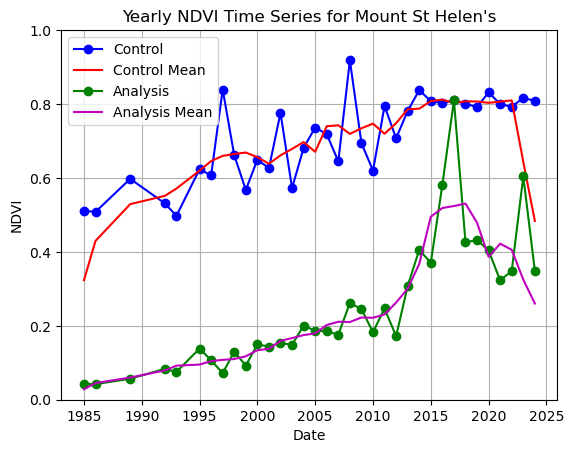

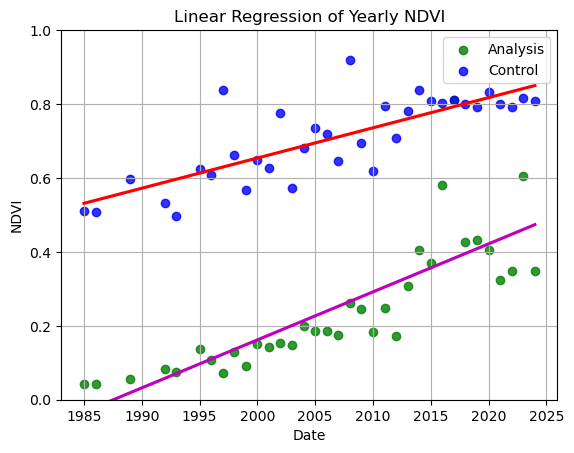

In [ ]:
# Plot Yearly Mean NDVI Time Series

date = ana_yearly_combined['year']           #extract date from dict
analysis = ana_yearly_combined['mean_ndvi'] #extract mean_ndvi
control = con_yearly_combined['mean_ndvi'] #extract mean_ndvi

ana_mean = moving_average(analysis, 5)
con_mean = moving_average(control, 5)

fig, ax = plt.subplots(1,1)        #plots time series of average NDVI
ax.set(xlabel='Date',ylabel='NDVI',ylim=[0,1],
       title="Yearly NDVI Time Series for Mount St Helen's")
ax.grid()
ax.plot(date, control, color="b", linestyle="-", marker='o', label="Control")
ax.plot(date, con_mean, color="r", linestyle="-", label="Control Mean")
ax.plot(date, analysis, color="g", linestyle="-", marker='o', label="Analysis")
ax.plot(date, ana_mean, color="m", linestyle="-", label="Analysis Mean")
ax.legend()

fig, ax = plt.subplots(1,1)        #plots time series of average NDVI
ax.set(xlabel='Date',ylabel='NDVI',ylim=[0,1],
       title="Linear Regression of Yearly NDVI")
ax.grid()
sns.regplot(x=date, y=analysis, ci=False, line_kws={'color':'m'}, scatter_kws={"color":"green"}, label = "Analysis");
sns.regplot(x=date, y=control, ci=False, line_kws={'color':'red'}, scatter_kws={"color":"blue"}, label = "Control");
ax.legend()

result1 = sc.stats.linregress(date, analysis)
print("Analysis Region")
print(f"slope = {result1.slope}")
print(f"intercept = {result1.intercept}")
print(f"r = {result1.rvalue}")
print(f"p = {result1.pvalue}")
print(f"stdev = {result1.stderr}")

result2 = sc.stats.linregress(date, control)
print("Control Region")
print(f"slope = {result2.slope}")
print(f"intercept = {result2.intercept}")
print(f"r = {result2.rvalue}")
print(f"p = {result2.pvalue}")
print(f"stdev = {result2.stderr}")

Analysis Region
slope = 0.003526815480455027
intercept = 0.0019386700314120153
r = 0.6784132328234597
p = 8.397189959742599e-20
stdev = 0.00032871541908118906
Control Region
slope = 0.002153330313408906
intercept = 0.5574144701636616
r = 0.4322474345393233
p = 1.3314944946951953e-07
stdev = 0.0003866338951357697


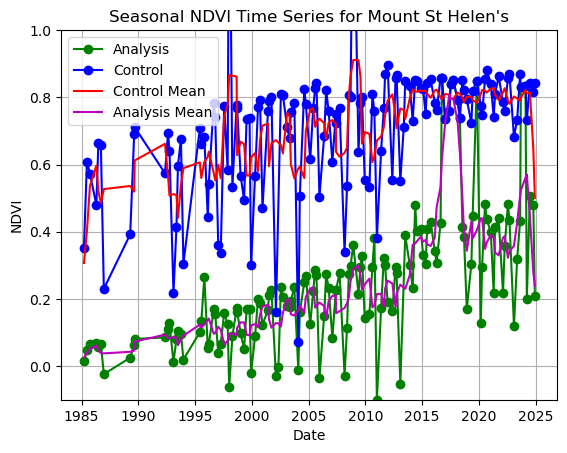

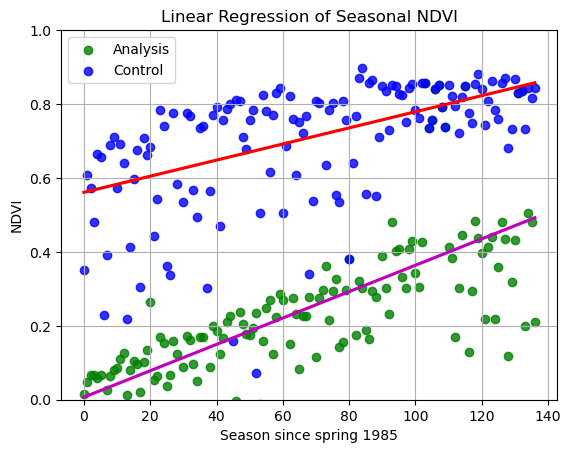

In [ ]:
# Plot Seasonal NDVI Time Series

date = ana_seasonal_combined['date']           #extract date from dict
mean_ndvi1 = ana_seasonal_combined['mean_ndvi'] #extract mean_ndvi
ndvi_mask1 = np.isfinite(mean_ndvi1)
ana_masked_date = np.array(date)[ndvi_mask1]
ana_masked_ndvi = np.array(mean_ndvi1)[ndvi_mask1]

mean_ndvi2 = con_seasonal_combined['mean_ndvi'] #extract mean_ndvi
ndvi_mask2 = np.isfinite(mean_ndvi2)
con_masked_date = np.array(date)[ndvi_mask2]
con_masked_ndvi = np.array(mean_ndvi2)[ndvi_mask2]

date_nums = np.arange(0,len(date))

date_nums1 = np.arange(0,len(ana_masked_date))
date_nums2 = np.arange(0,len(con_masked_date))

ana_mean = moving_average(ana_masked_ndvi, 5)
con_mean = moving_average(con_masked_ndvi, 5)

fig, ax = plt.subplots(1,1)        #plots time series of average NDVI
ax.set(xlabel='Date',ylabel='NDVI',ylim=[-0.1,1],
       title="Seasonal NDVI Time Series for Mount St Helen's")
ax.grid()
ax.plot(ana_masked_date, ana_masked_ndvi, color="g",
        linestyle="-", marker = 'o', label = "Analysis")
ax.plot(con_masked_date, con_masked_ndvi, color="b",
        linestyle="-", marker = 'o', label = "Control")

ax.plot(con_masked_date, con_mean, color="r", linestyle="-", label="Control Mean")
ax.plot(ana_masked_date, ana_mean, color="m", linestyle="-", label="Analysis Mean")
ax.legend()

fig, ax = plt.subplots(1,1)        #plots time series of average NDVI
ax.set(xlabel='Season since spring 1985',ylabel='NDVI',ylim=[0,1],
       title="Linear Regression of Seasonal NDVI")
ax.grid()
p1 = sns.regplot(x=date_nums1, y=ana_masked_ndvi, ci=False, line_kws={'color':'m'}, scatter_kws={"color":"green"}, label = "Analysis");
p2 = sns.regplot(x=date_nums2, y=con_masked_ndvi, ci=False, line_kws={'color':'red'}, scatter_kws={"color":"blue"}, label = "Control");
ax.legend()

mask1 = np.isfinite(date_nums) & np.isfinite(mean_ndvi1)
result1 = sc.stats.linregress(date_nums[mask1], np.array(mean_ndvi1)[mask1])
print("Analysis Region")
print(f"slope = {result1.slope}")
print(f"intercept = {result1.intercept}")
print(f"r = {result1.rvalue}")
print(f"p = {result1.pvalue}")
print(f"stdev = {result1.stderr}")

mask2 = np.isfinite(date_nums) & np.isfinite(mean_ndvi2)
result2 = sc.stats.linregress(date_nums[mask2], np.array(mean_ndvi2)[mask2])
print("Control Region")
print(f"slope = {result2.slope}")
print(f"intercept = {result2.intercept}")
print(f"r = {result2.rvalue}")
print(f"p = {result2.pvalue}")
print(f"stdev = {result2.stderr}")

In [15]:
def calc_yearly_change(ndvi_dict):
    index_nums = np.arange(1,len(ndvi_dict["year"]))
    change_dict = {"year":[],"change":[]}
    for i in index_nums:
        year = ndvi_dict["year"][i]
        change = ndvi_dict["mean_ndvi"][i] - ndvi_dict["mean_ndvi"][i-1]
        change_dict["year"].append(year)
        change_dict["change"].append(change)
    return change_dict

In [16]:
ana_change = calc_yearly_change(ana_yearly_combined)
con_change = calc_yearly_change(con_yearly_combined)

Analysis
slope = -0.0004901085547106253
intercept = 0.9927520395459822
r = -0.04398959891949961
p = 0.8048877607597323
stdev = 0.0019676447278338754
Control Region
slope = -0.00047862537034172007
intercept = 0.969441416891492
r = -0.04582015438281045
p = 0.7969343281833678
stdev = 0.0018446237718969145


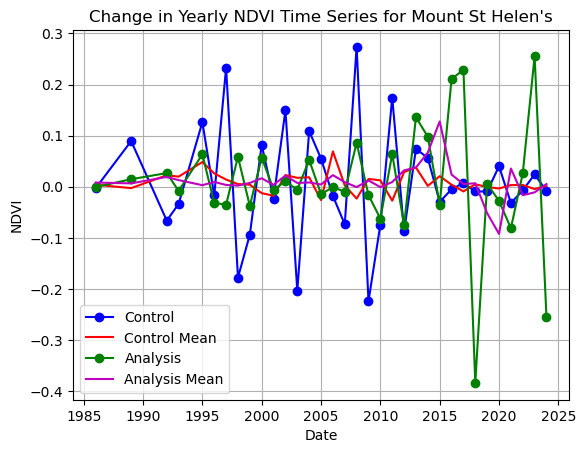

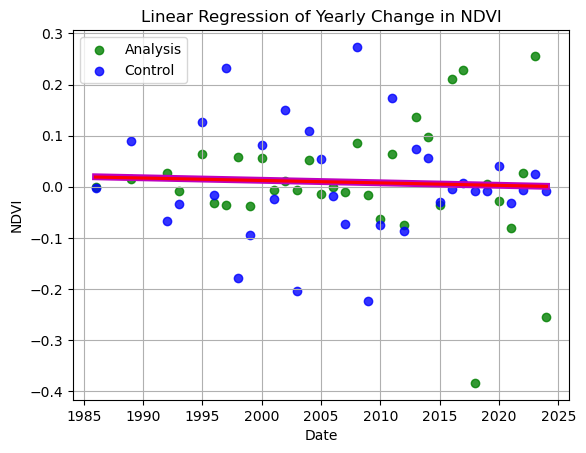

In [164]:
#Plot Change in Yearly NDVI Time Series

date = ana_change['year']           #extract date from dict
analysis = ana_change['change'] #extract mean_ndvi
control = con_change['change'] #extract mean_ndvi

ana_mean = moving_average(analysis, 5)
con_mean = moving_average(control, 5)

fig, ax = plt.subplots(1,1)        #plots time series of average NDVI
ax.set(xlabel='Date',ylabel='NDVI',
       title="Change in Yearly NDVI Time Series for Mount St Helen's")
ax.grid()
ax.plot(date, control, color="b", linestyle="-", marker='o', label="Control")
ax.plot(date, con_mean, color="r", linestyle="-", label="Control Mean")
ax.plot(date, analysis, color="g", linestyle="-", marker='o', label="Analysis")
ax.plot(date, ana_mean, color="m", linestyle="-", label="Analysis Mean")
ax.legend()

fig, ax = plt.subplots(1,1)        #plots time series of average NDVI
ax.set(xlabel='Date',ylabel='NDVI',
       title="Linear Regression of Yearly Change in NDVI")
ax.grid()
sns.regplot(x=date, y=analysis, ci=False, line_kws={'color':'m', "linewidth":5}, scatter_kws={"color":"green"}, label = "Analysis");
sns.regplot(x=date, y=control, ci=False, line_kws={'color':'red'}, scatter_kws={"color":"blue"}, label = "Control");
ax.legend()

result1 = sc.stats.linregress(date, analysis)
print("Analysis")
print(f"slope = {result1.slope}")
print(f"intercept = {result1.intercept}")
print(f"r = {result1.rvalue}")
print(f"p = {result1.pvalue}")
print(f"stdev = {result1.stderr}")

result2 = sc.stats.linregress(date, control)
print("Control Region")
print(f"slope = {result2.slope}")
print(f"intercept = {result2.intercept}")
print(f"r = {result2.rvalue}")
print(f"p = {result2.pvalue}")
print(f"stdev = {result2.stderr}")

In [19]:
# Create a Cartopy Map Projection
import cartopy.crs as ccrs
import cartopy
from pyresample.utils.cartopy import Projection

cartopy_crs = Projection(the_band.rio.crs, the_band.rio.bounds())

ana_lon, ana_lat = -122.223611, 46.257066 #St Helens analysis region
con_lat, con_lon = 46.190630, -122.286143 #St Helens control region
ana_x, ana_y = cartopy_crs.transform_point(ana_lon,ana_lat,ccrs.Geodetic())
con_x, con_y = cartopy_crs.transform_point(con_lon,con_lat,ccrs.Geodetic())

#make a 2 km x 2 km box around each point

ana_ll_x = ana_x - 2000
ana_ll_y = ana_y - 2000
ana_ur_x = ana_x + 2000
ana_ur_y = ana_y + 2000

con_ll_x = con_x - 2000
con_ll_y = con_y - 2000
con_ur_x = con_x + 2000
con_ur_y = con_y + 2000

ana_bounding_box = ana_ll_x, ana_ll_y, ana_ur_x, ana_ur_y
con_bounding_box = con_ll_x, con_ll_y, con_ur_x, con_ur_y


[Text(0.5, 0, ''), Text(0, 0.5, '')]

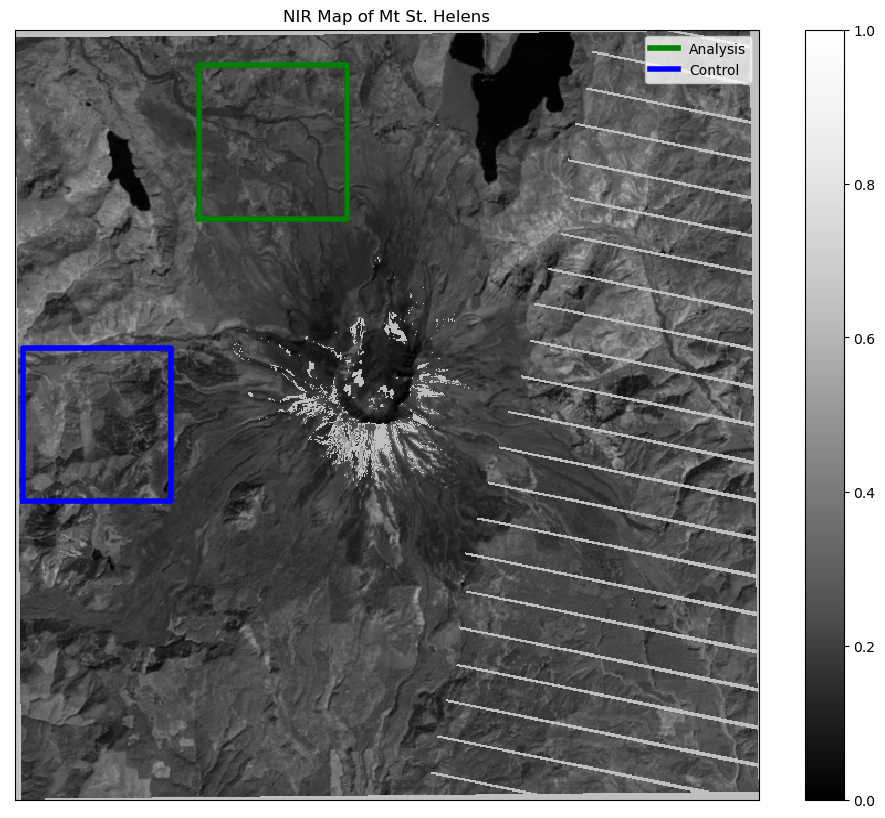

In [178]:
#Plot NIR Map with Study Area Plotted

band_name = "NIR"
infile = a301_lib.sat_data / f"ajb/landsat7/nir/2012-08-25_nir.tiff"

the_band = rioxarray.open_rasterio(infile,masked=True) 
scaled_band = the_band*the_band.scale_factor
masked_band = scaled_band

ana_clipped_file = a301_lib.sat_data / "ajb/sthelens_clipped_analysisregion.tif"
ana_clipped_ds = rioxarray.open_rasterio(ana_clipped_file, mask_and_scale=True)
ana_clipped_transform = ana_clipped_ds.rio.transform()
ana_clipped_bounds = ana_clipped_ds.rio.bounds()

con_clipped_file = a301_lib.sat_data / "ajb/sthelens_clipped_controlregion.tif"
con_clipped_ds = rioxarray.open_rasterio(con_clipped_file, mask_and_scale=True)
con_clipped_transform = con_clipped_ds.rio.transform()
con_clipped_bounds = con_clipped_ds.rio.bounds()

ana_box_x = [ana_clipped_bounds[0], ana_clipped_bounds[2], ana_clipped_bounds[2], ana_clipped_bounds[0], ana_clipped_bounds[0]]
ana_box_y = [ana_clipped_bounds[1], ana_clipped_bounds[1], ana_clipped_bounds[3], ana_clipped_bounds[3], ana_clipped_bounds[1]]

con_box_x = [con_clipped_bounds[0], con_clipped_bounds[2], con_clipped_bounds[2], con_clipped_bounds[0], con_clipped_bounds[0]]
con_box_y = [con_clipped_bounds[1], con_clipped_bounds[1], con_clipped_bounds[3], con_clipped_bounds[3], con_clipped_bounds[1]]

pal = copy(plt.get_cmap("Greys_r"))
pal.set_bad("0.75")  # 75% grey for out-of-map cells
pal.set_over("w")  # color cells > vmax red
pal.set_under("k")  # color cells < vmin black
vmin = 0.0  #anything under this is colored black
vmax = 1  #anything over this is colored red
from matplotlib.colors import Normalize
the_norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

fig, ax = plt.subplots(1,1, figsize=(12,10))
masked_band.plot(ax=ax, cmap=pal, norm=the_norm)
ax.set_title(f"NIR Map of Mt St. Helens")
ax.plot(ana_box_x, ana_box_y, "g", linewidth=4)
ax.plot(con_box_x, con_box_y, "b", linewidth=4)
ax.legend(["Analysis", "Control"])
plt.xticks([])
plt.yticks([])
ax.set(xlabel="",ylabel="")

[Text(0.5, 0, 'NDVI'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'NDVI Histogram'),
 (0.0, 1.0)]

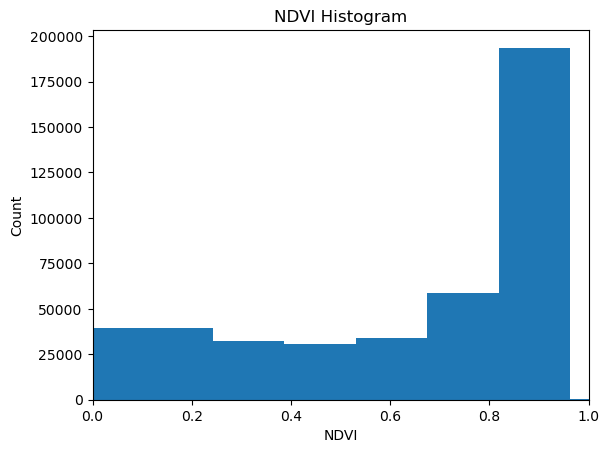

In [179]:
# Plot NDVI Histogram

infile2 = a301_lib.sat_data / f"ajb/landsat7/red/2012-08-25_red.tiff"

the_band2 = rioxarray.open_rasterio(infile2,masked=True) 
scaled_band2 = the_band2*the_band2.scale_factor
masked_band2 = scaled_band2

maskedNDVI = (masked_band - masked_band2)/(masked_band + masked_band2)

fig,ax = plt.subplots(1,1)
maskedNDVI.plot.hist(bins=20)
ax.set(xlabel="NDVI", ylabel="Count",
       title="NDVI Histogram",
       xlim=[0,1])

[Text(0.5, 0, ''), Text(0, 0.5, '')]

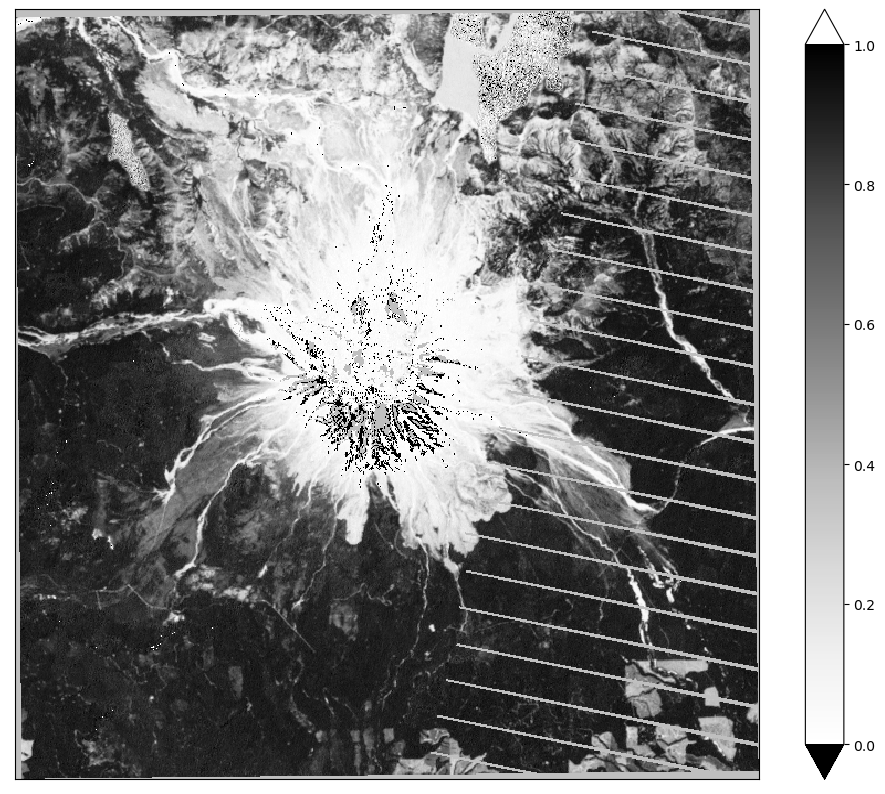

In [100]:
# Plot NDVI Map 

pal = copy(plt.get_cmap("Greys"))
pal.set_bad("0.75")  # 75% grey for out-of-map cells
pal.set_over("w")  # color cells > vmax red
pal.set_under("k")  # color cells < vmin black
vmin = 0.0  #anything under this is colored black
vmax = 1  #anything over this is colored red
from matplotlib.colors import Normalize
the_norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

fig, ax = plt.subplots(1,1, figsize=(12,10))
maskedNDVI.plot(ax=ax, cmap=pal, norm=the_norm)
ax.set_title(f"")
#ax.plot(ana_box_x, ana_box_y, "g", linewidth=4)
#ax.plot(con_box_x, con_box_y, "b", linewidth=4)
#ax.legend(["Analysis", "Control"])
plt.xticks([])
plt.yticks([])
ax.set(xlabel="",ylabel="")

[Text(0.5, 0, ''), Text(0, 0.5, '')]

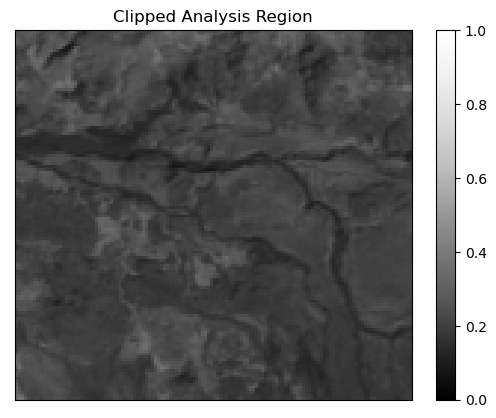

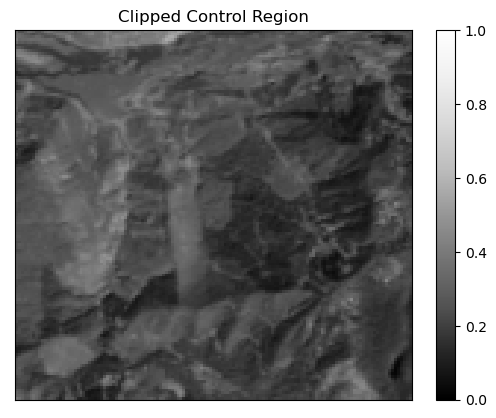

In [ ]:
#Plot Clipped Areas

ana_clipped_file = a301_lib.sat_data / "ajb/landsatee/clipped/ana/nir/ana_clipped_2012-08-25_nir.tiff"
ana_clipped_ds = rioxarray.open_rasterio(ana_clipped_file, mask_and_scale=True)
con_clipped_file = a301_lib.sat_data / "ajb/landsatee/clipped/con/nir/con_clipped_2012-08-25_nir.tiff"
con_clipped_ds = rioxarray.open_rasterio(con_clipped_file, mask_and_scale=True)

pal = copy(plt.get_cmap("Greys_r"))
pal.set_bad("0.75")  # 75% grey for out-of-map cells
pal.set_over("w")  # color cells > vmax red
pal.set_under("k")  # color cells < vmin black
vmin = 0.0  #anything under this is colored black
vmax = 1  #anything over this is colored red
from matplotlib.colors import Normalize
the_norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

fig, ax = plt.subplots(1,1)
ana_clipped_ds.plot(ax=ax, cmap=pal, norm=the_norm)
ax.set_title(f"Clipped Analysis Region")
plt.xticks([])
plt.yticks([])
ax.set(xlabel="",ylabel="")

fig, ax = plt.subplots(1,1)
con_clipped_ds.plot(ax=ax, cmap=pal, norm=the_norm)
ax.set_title(f"Clipped Control Region")
plt.xticks([])
plt.yticks([])
ax.set(xlabel="",ylabel="")

In [ ]:
# Calculate NDVI from Before the Eruption

geotiff_dir6 = a301_lib.sat_data / "ajb/landsat/before_geotiffs"
all_files6 = sorted(list(geotiff_dir6.glob("*tif"))) 

ana_bef_red = rioxarray.open_rasterio(all_files6[0], mask_and_scale=True)
ana_bef_nir = rioxarray.open_rasterio(all_files6[1], mask_and_scale=True)
con_bef_red = rioxarray.open_rasterio(all_files6[2], mask_and_scale=True)
con_bef_nir = rioxarray.open_rasterio(all_files6[3], mask_and_scale=True)

red_mult = 1.5088E-03
red_add = 0.002026
nir_mult = 1.5581E-03
nir_add = 0.006387 
sun_elev = np.deg2rad(33.63913880)

ana_bef_red_cor = (red_mult*ana_bef_red + red_add)/np.sin(sun_elev)
con_bef_red_cor = (red_mult*con_bef_red + red_add)/np.sin(sun_elev)

ana_bef_nir_cor = (nir_mult*ana_bef_nir + nir_add)/np.sin(sun_elev)
con_bef_nir_cor = (nir_mult*con_bef_nir + nir_add)/np.sin(sun_elev)

ana_bef_ndvi  = (ana_bef_nir_cor - ana_bef_red_cor)/(ana_bef_nir_cor + ana_bef_red_cor)
con_bef_ndvi  = (con_bef_nir_cor - con_bef_red_cor)/(con_bef_nir_cor + con_bef_red_cor)

ana_bef = ana_bef_ndvi.mean(dim=["band"]).values
con_bef = con_bef_ndvi.mean(dim=["band"]).values

print(np.mean(ana_bef))
print(np.mean(con_bef))

0.4069117
0.30673504


Text(0.5, 0.98, 'NDVI of Regions Before Eruption')

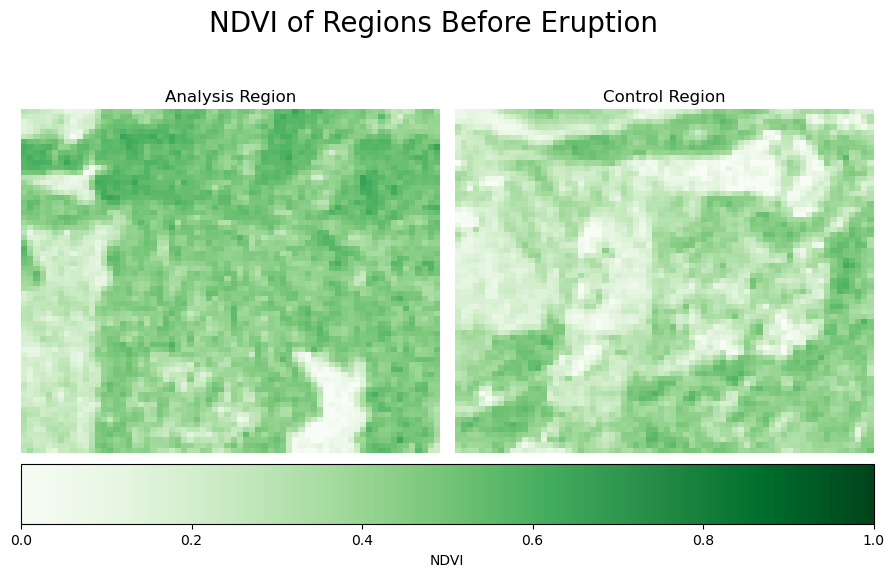

In [23]:
fig = plt.figure(figsize = (11,10))
nrows = 11
ncols = 10
anaax = plt.subplot2grid((nrows,ncols),(0,0), colspan = 5, rowspan = 5)
conax = plt.subplot2grid((nrows,ncols),(0,5), colspan = 5, rowspan = 5)
barax = plt.subplot2grid((nrows,ncols),(5,0), colspan = 10)
cx1 = anaax.pcolormesh(ana_bef_ndvi.x, ana_bef_ndvi.y, ana_bef, vmin=0, vmax=1, cmap="Greens")
anaax.set_axis_off()
cx2 = conax.pcolormesh(con_bef_ndvi.x, con_bef_ndvi.y, con_bef, vmin=0, vmax=1, cmap="Greens")
conax.set_axis_off()
plt.colorbar(cx1, cax=barax, orientation='horizontal', label='NDVI')
anaax.set(title = "Analysis Region")
conax.set(title = "Control Region")
fig.suptitle("NDVI of Regions Before Eruption", fontsize=20)

In [180]:
# Calculate NDVI from After the Eruption

geotiff_dir5 = a301_lib.sat_data / "ajb/landsat/eruption_geotiffs"
all_files5 = sorted(list(geotiff_dir5.glob("*tif"))) 

ana_red = rioxarray.open_rasterio(all_files5[0], mask_and_scale=True)
ana_nir = rioxarray.open_rasterio(all_files5[1], mask_and_scale=True)
con_red = rioxarray.open_rasterio(all_files5[2], mask_and_scale=True)
con_nir = rioxarray.open_rasterio(all_files5[3], mask_and_scale=True)

red_mult = 1.3206E-3
red_add = 0.008987
nir_mult = 1.3680E-3
nir_add = 0.010419
sun_elev = np.deg2rad(53.01038375)

ana_red_cor = (red_mult*ana_red + red_add)/np.sin(sun_elev)
con_red_cor = (red_mult*con_red + red_add)/np.sin(sun_elev)

ana_nir_cor = (nir_mult*ana_nir + nir_add)/np.sin(sun_elev)
con_nir_cor = (nir_mult*con_nir + nir_add)/np.sin(sun_elev)

ana_ndvi  = (ana_nir_cor - ana_red_cor)/(ana_nir_cor + ana_red_cor)
con_ndvi  = (con_nir_cor - con_red_cor)/(con_nir_cor + con_red_cor)

ana_ndvi_values = ana_ndvi.mean(dim="band").values
con_ndvi_values = con_ndvi.mean(dim="band").values

print(np.mean(ana_ndvi_values))
print(np.mean(con_ndvi_values))

-0.008604088
0.2683869


Text(0.5, 0.98, 'NDVI of Regions After Eruption')

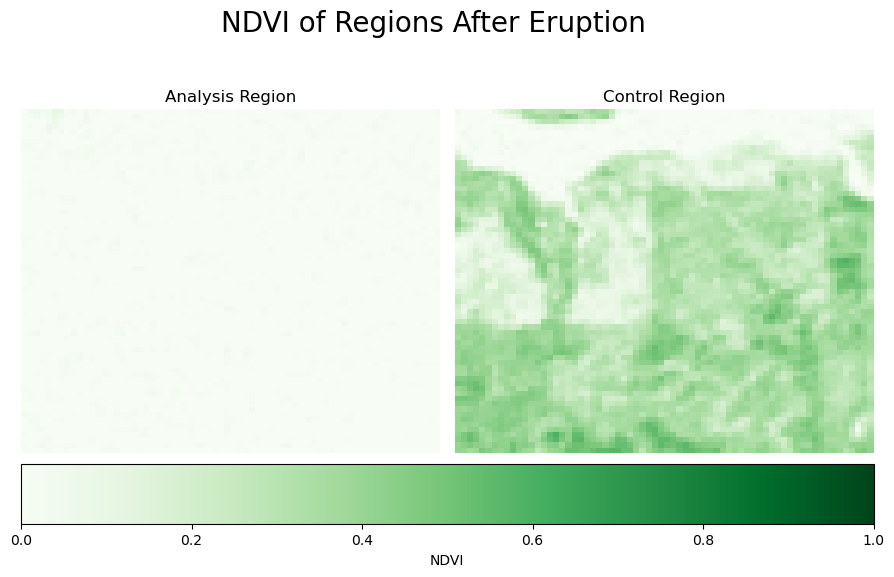

In [181]:
fig = plt.figure(figsize = (11,10))
nrows = 11
ncols = 10
anaax = plt.subplot2grid((nrows,ncols),(0,0), colspan = 5, rowspan = 5)
conax = plt.subplot2grid((nrows,ncols),(0,5), colspan = 5, rowspan = 5)
barax = plt.subplot2grid((nrows,ncols),(5,0), colspan = 10)
cx1 = anaax.pcolormesh(ana_ndvi.x, ana_ndvi.y, ana_ndvi_values, vmin=0, vmax=1, cmap="Greens")
anaax.set_axis_off()
cx2 = conax.pcolormesh(con_ndvi.x, con_ndvi.y, con_ndvi_values, vmin=0, vmax=1, cmap="Greens")
conax.set_axis_off()
plt.colorbar(cx1, cax=barax, orientation='horizontal', label='NDVI')
anaax.set(title = "Analysis Region")
conax.set(title = "Control Region")
fig.suptitle("NDVI of Regions After Eruption", fontsize=20)

Text(0.5, 0.98, 'Most Recent NDVI (2024-10-13)')

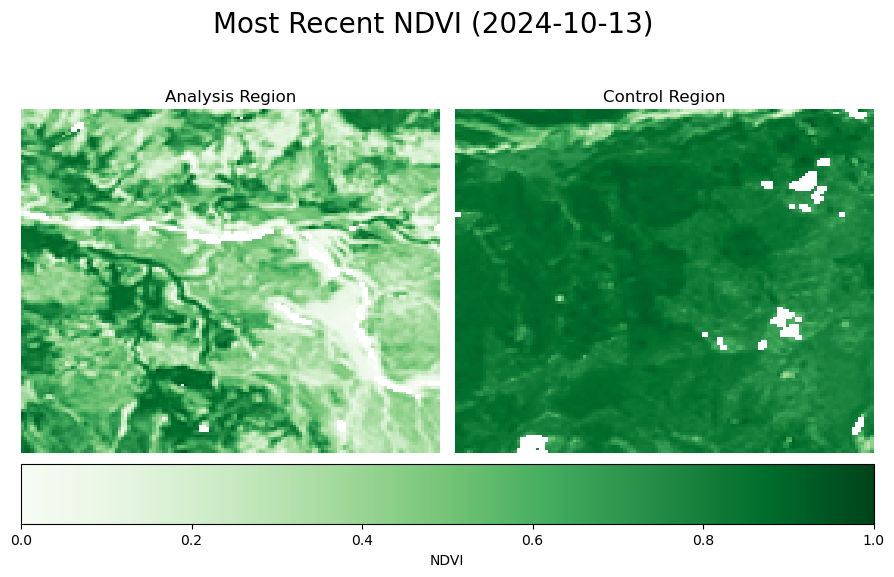

In [182]:
# Plot Most Recent NDVI

ana_current_file = ana_files[-2]
con_current_file = con_files[-2]

ana_current = rioxarray.open_rasterio(ana_current_file, mask_and_scale=True)
con_current = rioxarray.open_rasterio(con_current_file, mask_and_scale=True)

fig = plt.figure(figsize = (11,10))
nrows = 11
ncols = 10
anaax = plt.subplot2grid((nrows,ncols),(0,0), colspan = 5, rowspan = 5)
conax = plt.subplot2grid((nrows,ncols),(0,5), colspan = 5, rowspan = 5)
barax = plt.subplot2grid((nrows,ncols),(5,0), colspan = 10)
cx1 = anaax.pcolormesh(ana_current.x, ana_current.y, ana_current.ndvi.mean(dim="band"), vmin=0, vmax=1, cmap="Greens")
anaax.set_axis_off()
cx2 = conax.pcolormesh(con_current.x, con_current.y, con_current.ndvi.mean(dim="band"), vmin=0, vmax=1, cmap="Greens")
conax.set_axis_off()
plt.colorbar(cx1, cax=barax, orientation='horizontal', label='NDVI')
anaax.set(title = "Analysis Region")
conax.set(title = "Control Region")
fig.suptitle(f"Most Recent NDVI ({str(ana_current_file)[-22:-12]})", fontsize=20)

In [187]:
ana_eruption = ana_ndvi-ana_bef_ndvi
ana_erupt_change = ana_eruption.mean(dim="band").values

con_eruption = con_ndvi-con_bef_ndvi
con_erupt_change = con_eruption.mean(dim="band").values

print(ana_erupt_change.mean())
print(con_erupt_change.mean())

-0.41551584
-0.038348146


Text(0.5, 0.98, 'Change in NDVI due to the Eruption')

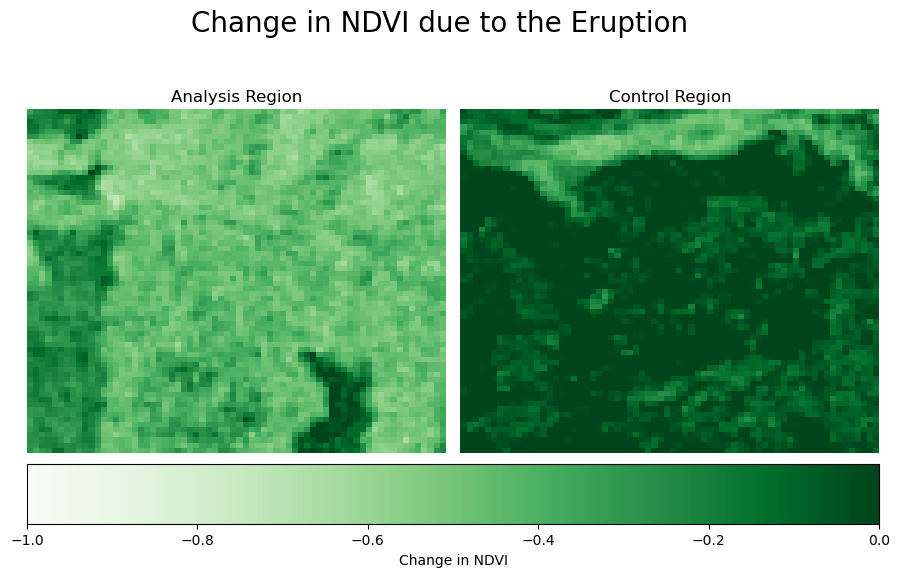

In [186]:
fig = plt.figure(figsize = (11,10))
nrows = 11
ncols = 10
anaax = plt.subplot2grid((nrows,ncols),(0,0), colspan = 5, rowspan = 5)
conax = plt.subplot2grid((nrows,ncols),(0,5), colspan = 5, rowspan = 5)
barax = plt.subplot2grid((nrows,ncols),(5,0), colspan = 10)
cx1 = anaax.pcolormesh(ana_eruption.x, ana_eruption.y, ana_erupt_change, vmin=-1, vmax=0, cmap="Greens")
anaax.set_axis_off()
cx2 = conax.pcolormesh(con_eruption.x, con_eruption.y, con_erupt_change, vmin=-1, vmax=0, cmap="Greens")
conax.set_axis_off()
plt.colorbar(cx1, cax=barax, orientation='horizontal', label='Change in NDVI')
anaax.set(title = "Analysis Region")
conax.set(title = "Control Region")
fig.suptitle("Change in NDVI due to the Eruption", fontsize=20)